# Visualize dose differences as a 3D volume visualization

In [1]:
import pydicom
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
from DicomRTTool.ReaderWriter import DicomReaderWriter
import SimpleITK as sitk

import pyvista as pv
import plotly.graph_objects as go

Analyzing subject:  DLDP_081


/home/akamath/miniconda3/envs/kbp/lib/python3.7/site-packages/pyvista/jupyter/notebook.py:61: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  f'Failed to use notebook backend: \n\n{e}\n\nFalling back to a static output.'


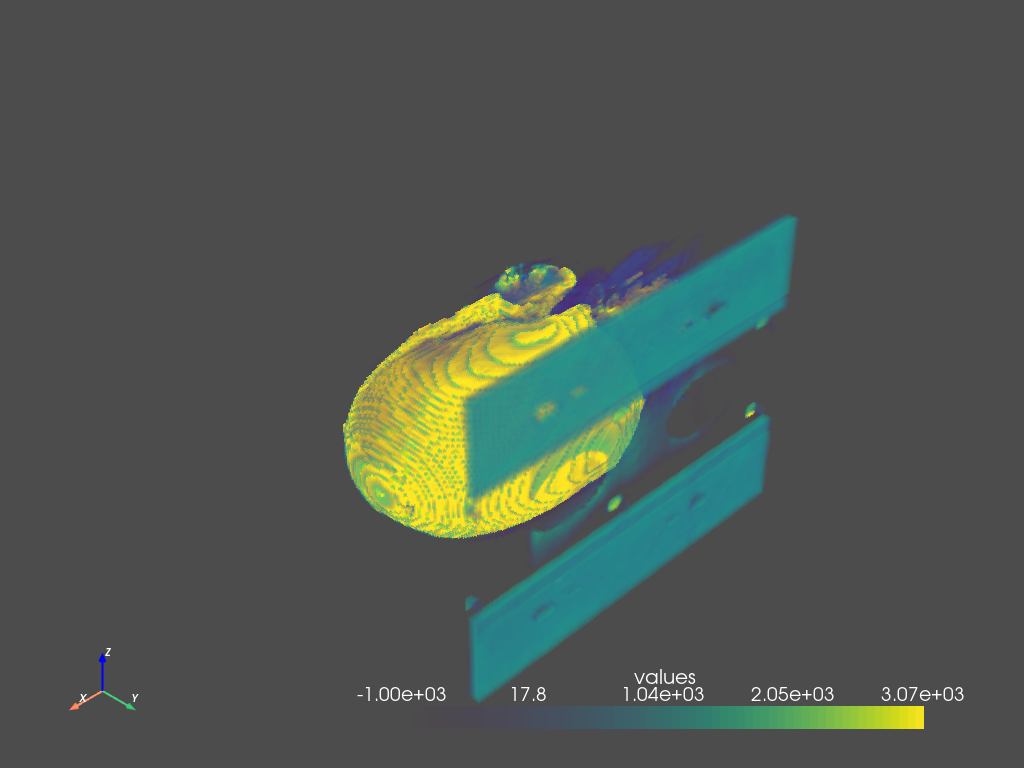

In [2]:
base_input_path = "/home/akamath/Documents/deep-planner/data/resized/"

subject_id = 81
    
str_id =  str(subject_id).zfill(3)
subject_name = "DLDP_" + str_id

print("Analyzing subject: ", subject_name)

ct_file = os.path.join(base_input_path, subject_name, "CT_resized.nii.gz")
dose_file = os.path.join(base_input_path, subject_name, "Dose_resized.nii.gz")
target_file = os.path.join(base_input_path, subject_name, "Target_resized.nii.gz")

# Import the reference image
ref_img_reader = sitk.ImageFileReader()
ref_img_reader.SetFileName(ct_file)
ref_img = ref_img_reader.Execute()

ref_array = sitk.GetArrayFromImage(ref_img)

data = pv.wrap(ref_array)
data.plot(volume=True) # Volume render

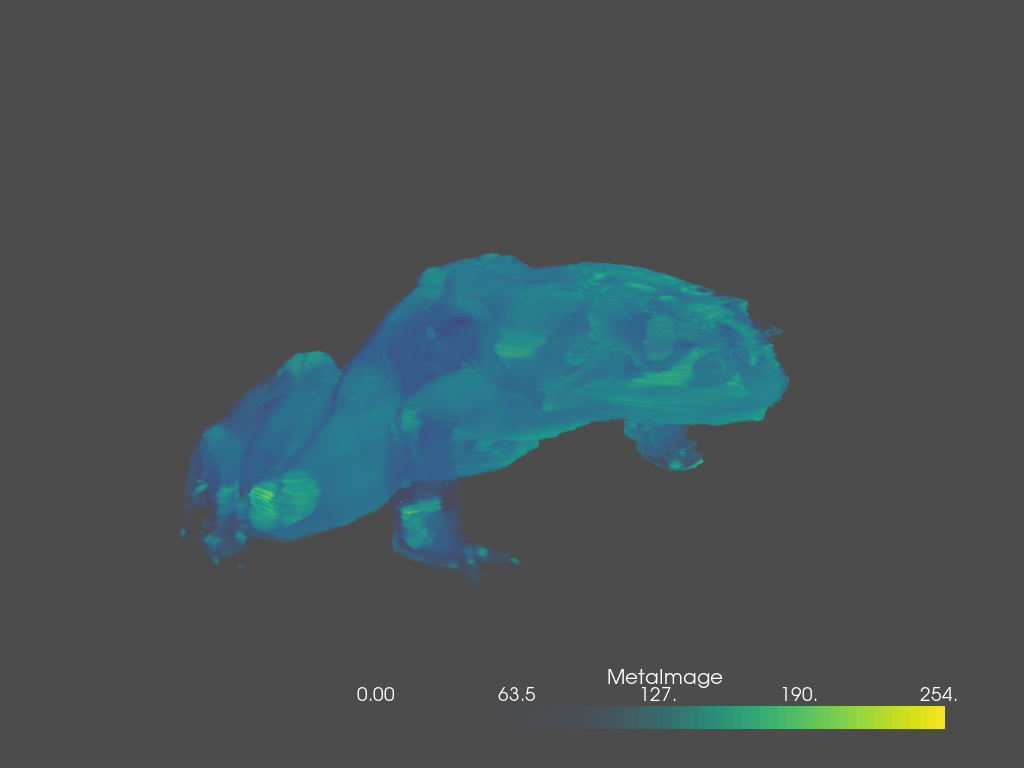

In [3]:
from pyvista import examples

frog = examples.download_frog()

p = pv.Plotter()
p.add_volume(frog, cmap="viridis", opacity="sigmoid_6")
p.camera_position = [(929.0, 1067.0, -278.9), (249.5, 234.5, 101.25), (-0.2048, -0.2632, -0.9427)]
p.show()

In [4]:
print(np.min(ref_array))

-1000.0


In [5]:
X, Y, Z = np.mgrid[0:1:64j, 0:1:64j, 0:1:64j]

ref_array_smaller = np.resize(ref_array, (64, 64, 64))
values =    np.sin(np.pi*X) * np.cos(np.pi*Z) * np.sin(np.pi*Y)

"""
fig = go.Figure(data=go.Volume(
    x=X.flatten(),
    y=Y.flatten(),
    z=Z.flatten(),
    value=values.flatten(),
    isomin=-0.1,
    isomax=1.0,
    opacity=0.1, # needs to be small to see through all surfaces
    surface_count=21, # needs to be a large number for good volume rendering
    ))
fig.show()
"""

'\nfig = go.Figure(data=go.Volume(\n    x=X.flatten(),\n    y=Y.flatten(),\n    z=Z.flatten(),\n    value=values.flatten(),\n    isomin=-0.1,\n    isomax=1.0,\n    opacity=0.1, # needs to be small to see through all surfaces\n    surface_count=21, # needs to be a large number for good volume rendering\n    ))\nfig.show()\n'

In [6]:

"""
fig = go.Figure(data=go.Isosurface(
    x=X.flatten(),
    y=Y.flatten(),
    z=Z.flatten(),
    value=ref_array_smaller.flatten(),
    isomin=-1000,
    isomax=1500,
    surface_count=20, # number of isosurfaces, 2 by default: only min and max
    colorbar_nticks=20, # colorbar ticks correspond to isosurface values
    caps=dict(x_show=False, y_show=False)
    ))
fig.show()
"""

'\nfig = go.Figure(data=go.Isosurface(\n    x=X.flatten(),\n    y=Y.flatten(),\n    z=Z.flatten(),\n    value=ref_array_smaller.flatten(),\n    isomin=-1000,\n    isomax=1500,\n    surface_count=20, # number of isosurfaces, 2 by default: only min and max\n    colorbar_nticks=20, # colorbar ticks correspond to isosurface values\n    caps=dict(x_show=False, y_show=False)\n    ))\nfig.show()\n'

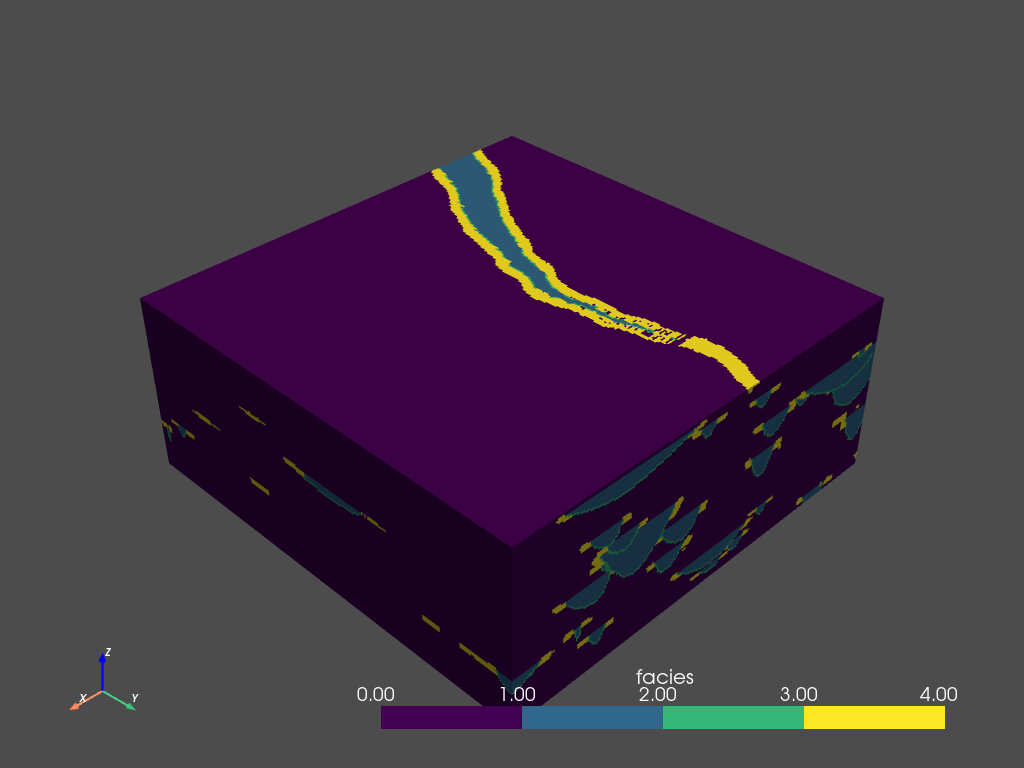

In [7]:
mesh = examples.load_channels()
# define a categorical colormap
cmap = plt.cm.get_cmap("viridis", 4)

mesh.plot(cmap=cmap)

In [8]:
print(type(mesh))

<class 'pyvista.core.grid.UniformGrid'>


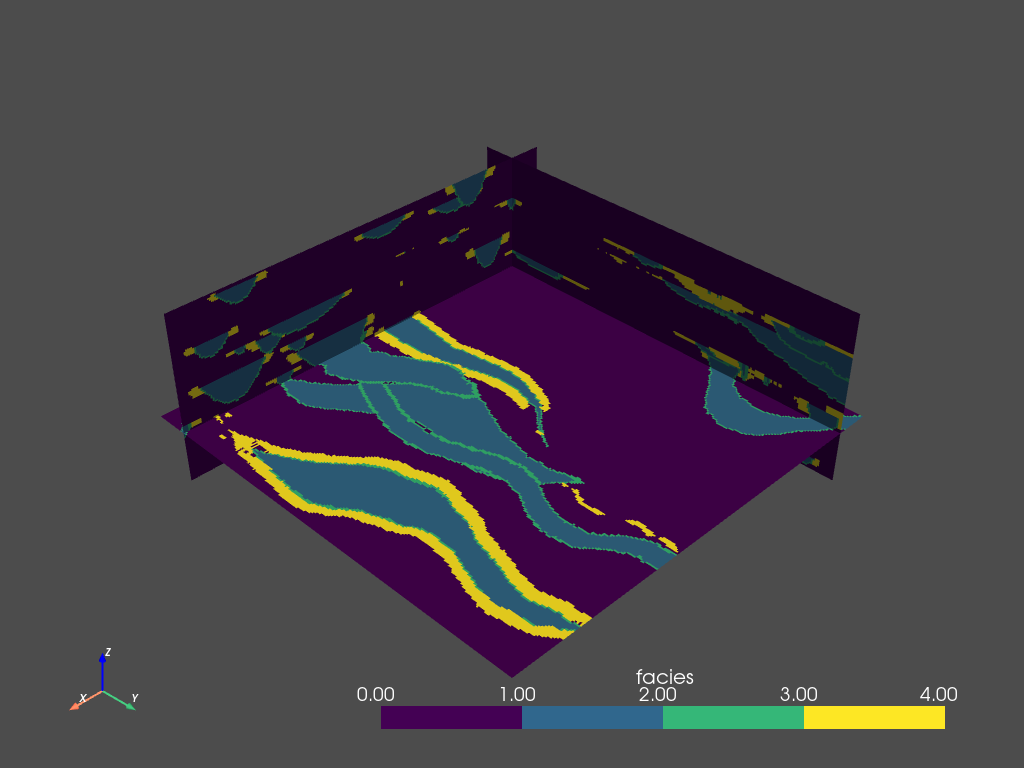

<class 'pyvista.core.composite.MultiBlock'>


In [9]:
slices = mesh.slice_orthogonal(x=20, y=20, z=30)
slices.plot(cmap=cmap)

print(type(slices))